<a href="https://colab.research.google.com/github/Danila-Kozlov/Portfolio/blob/main/ML/Leopard/Kaggle_Leopard_Chalange_CR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐆[Leopard Challenge] Классификация

[Ссылка на соревнование](https://www.kaggle.com/competitions/leopard-challenge-classification)

## Описание соревнования

Привет, леопарды! Меня зовут Глеб Михайлов и это учебное соревнование для студентов моего курса по Data Science на Stepik и Udemy.

Это задача классификации на предсказание курильщиков по клиническим показаниям. Решать можно любым алгоритмом, но я думаю, что тут в основном будет Кэтбуст).

После простого запуска кэтбуста можно попробовать пошаманить с фичами и параметрами модели, чтобы выбиться на первое место. Не забыть, что порог 0.5 не обязательно будет оптимальным: сначала настрой модель по метрикам ROC AUC и Average Precision, а потом уже подбирай оптимальный порог, чтобы получить наибольшую F1.

Также приветствуется EDA (исследовательский анализ данных) и публикация ноутбуков в разделе Code.

Предсказание модели будет оцениваться по F-мере (F1). F-мера представляет собой гармоническое среднее между точностью и полнотой. Веса для точности и полноты заданы одинаковые.



## Описание столбцов (параметров объекта):

* `ID` - уникальный номер записи (наблюдения)
* `age` - возраст
* `height(cm)` - рост
* `weight(kg)` - вес
* `waist(cm)` - длина окружность талии
* `eyesight(left)` - зрение на левом глазу
* `eyesight(right)` - зрение на правом глазу
* `hearing(left)` - слышимость левого уха
* `hearing(right)` - слышимость правого уха
* `systolic` - систолическое артериальное давление
* `relaxation` - диастолическое артериальное давление
* `fasting blood sugar` - тест на сахар в крови натощак
* `Cholesterol` - холестерин
* `triglyceride` - триглицерид
* `HDL` - холестерин липопротеинов высокой плотности
* `LDL` - липопротеины низкой плотности
* `hemoglobin` - гемоглобин
* `Urine` protein - белок в моче
* `serum` creatinine
* `AST` - Аспартатаминотрансфераза
* `ALT` - Аланинаминотрансфераза
* `Gtp` - Гамма‑глютамилтранспептидаза
* `oral`
* `dental` caries - кариес
* `tartar` - зубной камень
* `smoking` - курит человек, или нет. Целевой признак


## Файлы

* train.csv - выборка для обучения и валидации модели
* test.csv - выборка, на которой нужно предсказать цены и загрузить на Кагл
* sample_submission.csv - пример сабмишшена (файла, который загружать на Кагл) в правильном формате


Это соревнование сделано на основе открытого датасета.

## Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('dark_background')

https://drive.google.com/file/d/1J8WKmQkrCga2AYBZ-leKmefDkNuTO6wt/view?usp=sharing

In [3]:
!gdown 1J8WKmQkrCga2AYBZ-leKmefDkNuTO6wt

Downloading...
From: https://drive.google.com/uc?id=1J8WKmQkrCga2AYBZ-leKmefDkNuTO6wt
To: /content/leopard-challenge-classification.zip
100% 639k/639k [00:00<00:00, 10.5MB/s]


In [4]:
!unzip -o /content/leopard-challenge-classification.zip -d /content/leopard_challenge

Archive:  /content/leopard-challenge-classification.zip
  inflating: /content/leopard_challenge/sample_submission.csv  
  inflating: /content/leopard_challenge/test.csv  
  inflating: /content/leopard_challenge/train.csv  


In [5]:
train = pd.read_csv('/content/leopard_challenge/train.csv')
real_test = pd.read_csv('/content/leopard_challenge/test.csv')

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
train.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [8]:
real_test.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,Y,0,Y
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,Y,0,N
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,Y,0,Y
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,Y,0,Y
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,Y,0,N


Видим что target переменная у нас __`smoking`__ и она отсутствует в test

## Исследовательский анализ данных (EDA)

Для удобства мы сначала переведем названия столбцов в snake_case.

PS. В конце главное не забыть, что ответ должен быть с колонками [ ID, smoking ]

In [9]:
train.columns = [x.strip().replace(' ','_').lower() for x in train.columns]
print(train.columns)

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking'],
      dtype='object')


In [10]:
real_test.columns = [x.strip().replace(' ','_').lower() for x in real_test.columns]
print(real_test.columns)

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar'],
      dtype='object')


In [11]:
len(train)

13863

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

In [13]:
train.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
smoking                0
dtype: int64

In [14]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000
mean,9932.891654,41.743851,169.618409,71.270288,84.870627,1.057304,1.053740,1.028060,1.027411,123.430643,77.166703,99.937387,193.864387,130.917767,54.204357,114.435476,15.402200,1.093775,0.981808,27.597562,30.772921,43.442978,0.212075,0.201976
std,5715.739532,13.624383,6.493959,11.195751,8.194957,0.514618,0.514613,0.165151,0.163284,12.964684,9.459288,20.682085,35.658783,71.348298,13.168432,42.050428,1.052598,0.421272,0.240337,21.559820,36.441688,50.342097,0.408793,0.401489
min,1.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,74.000000,40.000000,48.000000,84.000000,16.000000,4.000000,7.000000,6.300000,1.000000,0.100000,7.000000,2.000000,2.000000,0.000000,0.000000
25%,4985.500000,30.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,115.000000,70.000000,90.000000,169.000000,78.000000,45.000000,91.000000,14.800000,1.000000,0.900000,20.000000,18.000000,20.000000,0.000000,0.000000
50%,9956.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,78.000000,96.000000,192.000000,113.000000,53.000000,113.000000,15.400000,1.000000,1.000000,24.000000,24.000000,29.000000,0.000000,0.000000
75%,14865.500000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,104.000000,216.000000,166.000000,61.000000,135.000000,16.100000,1.000000,1.100000,30.000000,35.000000,48.000000,0.000000,0.000000
max,19804.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,475.000000,441.000000,466.000000,359.000000,1340.000000,19.600000,6.000000,10.000000,981.000000,2914.000000,999.000000,1.000000,1.000000


In [15]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height(cm)           5942 non-null   int64  
 3   weight(kg)           5942 non-null   int64  
 4   waist(cm)            5942 non-null   float64
 5   eyesight(left)       5942 non-null   float64
 6   eyesight(right)      5942 non-null   float64
 7   hearing(left)        5942 non-null   float64
 8   hearing(right)       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

In [16]:
real_test.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
dtype: int64

Пропусков нет и это очень и очень замечательно!

In [17]:
train['smoking'].value_counts(normalize = True)

0    0.798024
1    0.201976
Name: smoking, dtype: float64

По этим данным видим, что у нас 20.1% курильщиков

In [18]:
train1,test1 = train_test_split(train, train_size = 0.6,random_state=42, stratify=train['smoking'])

In [19]:
val,test1 = train_test_split(test1, train_size = 0.5, random_state = 42, stratify=test1['smoking'])

In [20]:
train1['smoking'].mean()

0.2019959119874955

In [21]:
val['smoking'].mean()

0.2019473494410386

In [22]:
test1['smoking'].mean()

0.2019473494410386

## Phik

In [23]:
! pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 4.1 MB/s eta 0:00:00


In [24]:
import phik

In [25]:
phik_overview = train.phik_matrix()

interval columns not set, guessing: ['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'smoking']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable oral for analysis 1. Dropping this column
  warnings.warn(


Phik нас предупреждает о том, что нет уникальных значений для параметра oral, соответственно выкидывает этот столбец.

In [26]:
phik_overview['smoking'].sort_values(ascending=False).to_frame()

,smoking
smoking,1.000000
triglyceride,0.190617
age,0.183296
gtp,0.142844
hemoglobin,0.112074
tartar,0.104470
dental_caries,0.089124
waist(cm),0.062522
serum_creatinine,0.055594
hdl,0.050773


In [27]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking'],
      dtype='object')

In [28]:
phik_overview['smoking'].sort_values(ascending=False).index

Index(['smoking', 'triglyceride', 'age', 'gtp', 'hemoglobin', 'tartar',
       'dental_caries', 'waist(cm)', 'serum_creatinine', 'hdl', 'weight(kg)',
       'fasting_blood_sugar', 'hearing(left)', 'height(cm)', 'urine_protein',
       'hearing(right)', 'relaxation', 'ldl', 'systolic', 'cholesterol', 'alt',
       'ast', 'eyesight(right)', 'eyesight(left)', 'id'],
      dtype='object')

In [29]:
X = ['triglyceride', 'age', 'gtp', 'hemoglobin', 'tartar',
       'dental_caries', 'waist(cm)', 'serum_creatinine', 'hdl', 'weight(kg)',
       'fasting_blood_sugar', 'hearing(left)', 'height(cm)', 'urine_protein',
       'hearing(right)', 'relaxation', 'ldl', 'systolic', 'cholesterol', 'alt',
       'ast', 'eyesight(right)', 'eyesight(left)', 'smoking']

In [30]:
cm = sns.diverging_palette(230,20, as_cmap=True)

## Матрица корреляции

In [31]:
train[X].corr()

<ipython-input-31-dbe734d14c30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train[X].corr()


,triglyceride,age,gtp,hemoglobin,dental_caries,waist(cm),serum_creatinine,hdl,weight(kg),fasting_blood_sugar,hearing(left),height(cm),urine_protein,hearing(right),relaxation,ldl,systolic,cholesterol,alt,ast,eyesight(right),eyesight(left),smoking
triglyceride,1.000000,0.059680,0.260204,0.149628,0.022648,0.294913,0.001028,-0.378035,0.228002,0.206244,-0.013591,-0.018052,0.043893,-0.005801,0.180650,0.021647,0.150721,0.284393,0.139275,0.079573,0.006707,-0.009581,0.148264
age,0.059680,1.000000,0.086933,-0.231677,-0.091599,0.076083,0.053950,-0.076630,-0.250177,0.249683,0.236021,-0.431568,0.071429,0.235824,0.123107,0.003464,0.201221,-0.010172,-0.040013,0.036391,-0.172827,-0.170394,-0.014082
gtp,0.260204,0.086933,1.000000,0.086527,0.029353,0.190571,-0.007917,0.015707,0.111016,0.166118,-0.002476,-0.049456,0.076781,0.006667,0.152208,0.016389,0.147245,0.130744,0.300151,0.392140,-0.016073,-0.027654,0.133900
hemoglobin,0.149628,-0.231677,0.086527,1.000000,0.019319,0.137844,-0.023613,-0.058296,0.198819,-0.003312,-0.079575,0.124091,0.002837,-0.076951,0.134357,0.097736,0.052628,0.148720,0.120686,0.071622,0.035869,0.043432,0.082029
dental_caries,0.022648,-0.091599,0.029353,0.019319,1.000000,0.008492,-0.019983,-0.010611,0.027117,-0.009957,-0.015491,0.025595,-0.003644,-0.030897,0.007311,-0.008890,0.006192,0.005462,0.012477,0.006648,0.004151,-0.012164,0.057663
waist(cm),0.294913,0.076083,0.190571,0.137844,0.008492,1.000000,0.020510,-0.287922,0.790746,0.183002,0.014217,0.172743,0.065020,0.017967,0.239907,0.088632,0.255932,0.116682,0.216630,0.125552,0.005589,-0.017764,0.015579
serum_creatinine,0.001028,0.053950,-0.007917,-0.023613,-0.019983,0.020510,1.000000,-0.023575,0.025051,0.001367,-0.002768,0.001445,0.152798,0.001311,-0.011546,0.026153,-0.015528,0.020185,-0.007114,-0.016573,-0.022052,-0.010836,-0.041838
hdl,-0.378035,-0.076630,0.015707,-0.058296,-0.010611,-0.287922,-0.023575,1.000000,-0.229017,-0.096165,-0.022307,0.003143,-0.031946,-0.007806,-0.055314,-0.053695,-0.039884,0.138301,-0.089447,-0.016072,0.005374,0.016090,-0.042110
weight(kg),0.228002,-0.250177,0.111016,0.198819,0.027117,0.790746,0.025051,-0.229017,1.000000,0.075028,-0.073121,0.518707,0.026057,-0.066403,0.205638,0.074267,0.194841,0.103596,0.197703,0.095974,0.078283,0.065145,0.011526
fasting_blood_sugar,0.206244,0.249683,0.166118,-0.003312,-0.009957,0.183002,0.001367,-0.096165,0.075028,1.000000,0.044994,-0.097528,0.106671,0.040668,0.133829,-0.035943,0.169618,-0.006815,0.065836,0.065409,-0.055739,-0.066968,0.047777


In [32]:
train[X].corr().tail(1).style.background_gradient(cmap=cm, vmin = -1, vmax=1,)

<ipython-input-32-1dee03133191>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train[X].corr().tail(1).style.background_gradient(cmap=cm, vmin = -1, vmax=1,)


,triglyceride,age,gtp,hemoglobin,dental_caries,waist(cm),serum_creatinine,hdl,weight(kg),fasting_blood_sugar,hearing(left),height(cm),urine_protein,hearing(right),relaxation,ldl,systolic,cholesterol,alt,ast,eyesight(right),eyesight(left),smoking
smoking,0.148264,-0.014082,0.133900,0.082029,0.057663,0.015579,-0.041838,-0.042110,0.011526,0.047777,-0.024554,0.026243,0.022789,-0.018433,0.018753,-0.035390,-0.010530,0.006247,0.015452,0.020400,-0.008161,-0.010562,1.000000


<ipython-input-33-3808f2f5bfce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train[X].corr()


<Axes: >

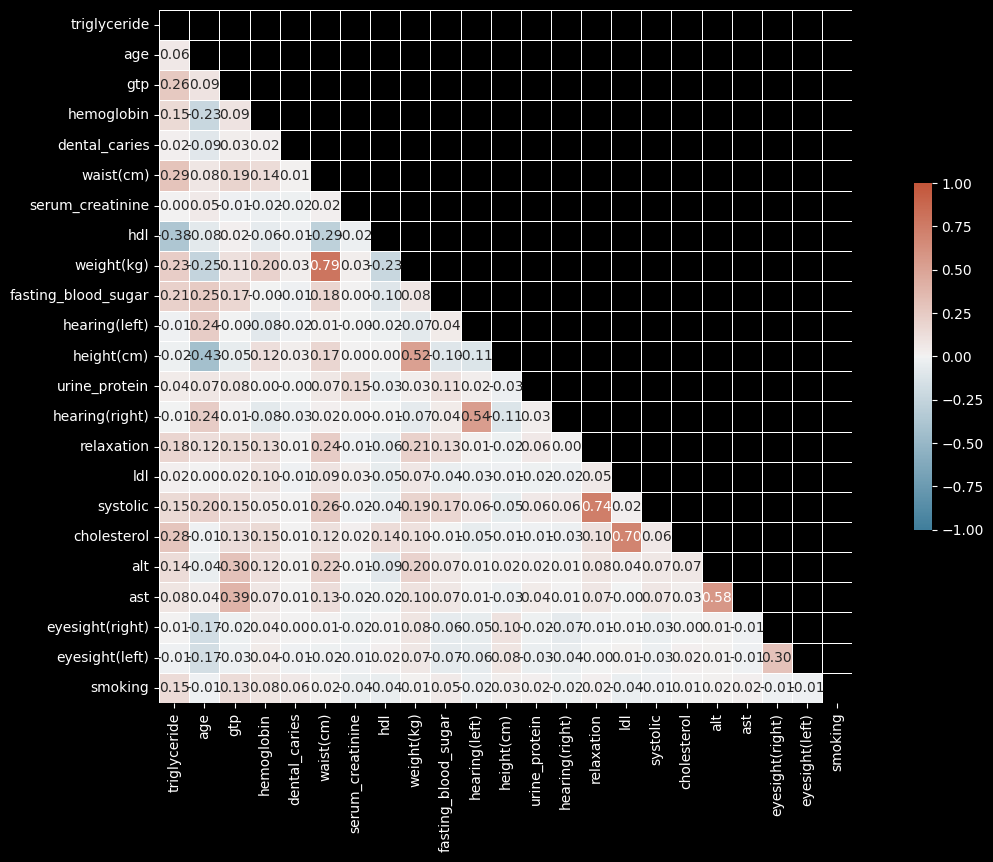

In [33]:
corr = train[X].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = '.2f')

# Человеческое обучение

In [34]:
print(X)

['triglyceride', 'age', 'gtp', 'hemoglobin', 'tartar', 'dental_caries', 'waist(cm)', 'serum_creatinine', 'hdl', 'weight(kg)', 'fasting_blood_sugar', 'hearing(left)', 'height(cm)', 'urine_protein', 'hearing(right)', 'relaxation', 'ldl', 'systolic', 'cholesterol', 'alt', 'ast', 'eyesight(right)', 'eyesight(left)', 'smoking']


In [35]:
train['triglyceride'].head(10)

0     51.0
1    239.0
2     60.0
3    155.0
4     73.0
5     74.0
6     36.0
7    116.0
8     38.0
9    130.0
Name: triglyceride, dtype: float64

In [36]:
train['triglyceride'].describe().to_frame()

,triglyceride
count,13863.000000
mean,130.917767
std,71.348298
min,16.000000
25%,78.000000
50%,113.000000
75%,166.000000
max,466.000000


<Axes: >

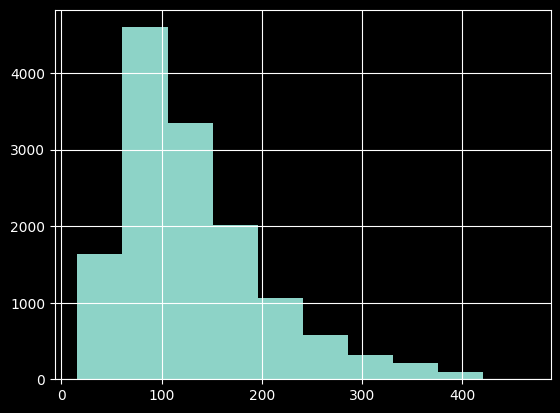

In [37]:
train['triglyceride'].hist( )

In [38]:
train['triglyceride_group'] = pd.qcut(train['triglyceride'], 5, duplicates = 'drop')

In [39]:
train.groupby('triglyceride_group')['smoking'].agg(['count','mean'])

,count,mean
triglyceride_group,,
"(15.999, 72.0]",2865,0.118325
"(72.0, 99.0]",2755,0.165517
"(99.0, 131.0]",2745,0.206557
"(131.0, 182.0]",2751,0.226463
"(182.0, 466.0]",2747,0.296687


In [40]:
cm = sns.dark_palette("red", as_cmap=True)

def print_error(df,col,target):
  if col in ('dental_caries','tartar'):
    pass
  else:
    df[col+'_group'] = pd.qcut(df[col], 5, duplicates = 'drop')
    t = df.groupby(col+'_group')[target].agg(['count', 'mean'])
    display(t.style.background_gradient(cmap=cm, subset = 'mean'))

In [41]:
print_error(train, 'triglyceride','smoking')

,count,mean
triglyceride_group,,
"(15.999, 72.0]",2865,0.118325
"(72.0, 99.0]",2755,0.165517
"(99.0, 131.0]",2745,0.206557
"(131.0, 182.0]",2751,0.226463
"(182.0, 466.0]",2747,0.296687


Действительно видим зависимость, что чем выше параметр триглицерина, тем выше вероятность того, что это курильщик.

In [42]:
print(X[:-1])

['triglyceride', 'age', 'gtp', 'hemoglobin', 'tartar', 'dental_caries', 'waist(cm)', 'serum_creatinine', 'hdl', 'weight(kg)', 'fasting_blood_sugar', 'hearing(left)', 'height(cm)', 'urine_protein', 'hearing(right)', 'relaxation', 'ldl', 'systolic', 'cholesterol', 'alt', 'ast', 'eyesight(right)', 'eyesight(left)']


In [43]:
train['tartar'].value_counts()

Y    7517
N    6346
Name: tartar, dtype: int64

In [44]:
train[X[:-1]].dtypes.to_frame()

,0
triglyceride,float64
age,int64
gtp,float64
hemoglobin,float64
tartar,object
dental_caries,int64
waist(cm),float64
serum_creatinine,float64
hdl,float64
weight(kg),int64


In [45]:
for col in X[:-1]:
  print_error(train, col, 'smoking')

,count,mean
triglyceride_group,,
"(15.999, 72.0]",2865,0.118325
"(72.0, 99.0]",2755,0.165517
"(99.0, 131.0]",2745,0.206557
"(131.0, 182.0]",2751,0.226463
"(182.0, 466.0]",2747,0.296687


,count,mean
age_group,,
"(19.999, 30.0]",3923,0.165690
"(30.0, 35.0]",1765,0.171671
"(35.0, 40.0]",2662,0.276108
"(40.0, 55.0]",3218,0.249223
"(55.0, 85.0]",2295,0.135076


,count,mean
gtp_group,,
"(1.999, 19.0]",3199,0.128478
"(19.0, 25.0]",2544,0.146226
"(25.0, 35.0]",2797,0.189131
"(35.0, 55.0]",2615,0.235564
"(55.0, 999.0]",2708,0.322009


,count,mean
hemoglobin_group,,
"(6.2989999999999995, 14.6]",2979,0.169184
"(14.6, 15.2]",2895,0.175820
"(15.2, 15.7]",2830,0.196820
"(15.7, 16.2]",2425,0.213196
"(16.2, 19.6]",2734,0.260790


,count,mean
waist(cm)_group,,
"(50.999, 78.0]",2887,0.204364
"(78.0, 82.5]",2728,0.189883
"(82.5, 86.2]",2708,0.188331
"(86.2, 91.0]",2802,0.203426
"(91.0, 128.0]",2738,0.223521


,count,mean
serum_creatinine_group,,
"(0.099, 0.8]",2852,0.233170
"(0.8, 0.9]",3279,0.213480
"(0.9, 1.0]",3544,0.199492
"(1.0, 1.1]",2340,0.185043
"(1.1, 10.0]",1848,0.159632


,count,mean
hdl_group,,
"(3.999, 43.0]",2795,0.236852
"(43.0, 49.0]",2801,0.218850
"(49.0, 56.0]",3106,0.189955
"(56.0, 64.0]",2504,0.187700
"(64.0, 359.0]",2657,0.175009


,count,mean
weight(kg)_group,,
"(39.999, 60.0]",2941,0.201632
"(60.0, 70.0]",5211,0.195548
"(70.0, 75.0]",2212,0.188517
"(75.0, 80.0]",1481,0.206617
"(80.0, 130.0]",2018,0.230426


,count,mean
fasting_blood_sugar_group,,
"(47.999, 88.0]",2888,0.190789
"(88.0, 94.0]",3052,0.184142
"(94.0, 99.0]",2733,0.192828
"(99.0, 107.0]",2595,0.214258
"(107.0, 475.0]",2595,0.232755


,count,mean
hearing(left)_group,,
"(0.999, 2.0]",13863,0.201976


,count,mean
height(cm)_group,,
"(144.999, 165.0]",5095,0.184298
"(165.0, 170.0]",4238,0.211656
"(170.0, 175.0]",3021,0.222112
"(175.0, 190.0]",1509,0.194168


,count,mean
urine_protein_group,,
"(0.999, 6.0]",13863,0.201976


,count,mean
hearing(right)_group,,
"(0.999, 2.0]",13863,0.201976


,count,mean
relaxation_group,,
"(39.999, 70.0]",3794,0.189773
"(70.0, 75.0]",2167,0.190586
"(75.0, 80.0]",3578,0.211850
"(80.0, 85.0]",1873,0.214095
"(85.0, 140.0]",2451,0.207262


,count,mean
ldl_group,,
"(6.999, 86.0]",2843,0.232853
"(86.0, 105.0]",2836,0.202045
"(105.0, 121.0]",2733,0.199049
"(121.0, 141.0]",2779,0.191796
"(141.0, 1340.0]",2672,0.182635


,count,mean
systolic_group,,
"(73.999, 112.0]",2895,0.200691
"(112.0, 120.0]",3508,0.206385
"(120.0, 126.0]",1918,0.203858
"(126.0, 134.0]",2948,0.203528
"(134.0, 240.0]",2594,0.194295


,count,mean
cholesterol_group,,
"(83.999, 164.0]",2854,0.204275
"(164.0, 184.0]",2839,0.194082
"(184.0, 201.0]",2697,0.200222
"(201.0, 222.0]",2710,0.208118
"(222.0, 441.0]",2763,0.203402


,count,mean
alt_group,,
"(1.999, 17.0]",3380,0.200592
"(17.0, 21.0]",2329,0.176471
"(21.0, 27.0]",2645,0.200000
"(27.0, 39.0]",2832,0.207627
"(39.0, 2914.0]",2677,0.221890


,count,mean
ast_group,,
"(6.999, 19.0]",3070,0.203909
"(19.0, 22.0]",2593,0.193984
"(22.0, 26.0]",2995,0.195326
"(26.0, 32.0]",2605,0.201536
"(32.0, 981.0]",2600,0.215769


,count,mean
eyesight(right)_group,,
"(0.099, 0.8]",3611,0.201606
"(0.8, 1.0]",4345,0.201841
"(1.0, 1.2]",3422,0.198714
"(1.2, 9.9]",2485,0.207243


,count,mean
eyesight(left)_group,,
"(0.099, 0.8]",3590,0.202786
"(0.8, 1.0]",4210,0.201425
"(1.0, 1.2]",3559,0.203428
"(1.2, 9.9]",2504,0.199681


Все что близко к 20% - это все случайная выборка. У нас 20% курильщиков в среднем. Поэтому самые эффективные переменные:

triglyceride_group, age_group, gtp_group

In [46]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking',
       'triglyceride_group', 'age_group', 'gtp_group', 'hemoglobin_group',
       'waist(cm)_group', 'serum_creatinine_group', 'hdl_group',
       'weight(kg)_group', 'fasting_blood_sugar_group', 'hearing(left)_group',
       'height(cm)_group', 'urine_protein_group', 'hearing(right)_group',
       'relaxation_group', 'ldl_group', 'systolic_group', 'cholesterol_group',
       'alt_group', 'ast_group', 'eyesight(right)_group',
       'eyesight(left)_group'],
      dtype='object')

## Baseline


### Обучающая, валидационная и тестовая выборка на датасете train

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train1, test1 = train_test_split(train,train_size=0.6,random_state=42,stratify=train['smoking'])

In [49]:
val, test1 = train_test_split(test1,train_size=0.5,random_state=42,stratify=test1['smoking'])

In [50]:
train_full=pd.concat([train1,val])

In [51]:
model = train_full.groupby('triglyceride_group')['smoking'].agg(['mean']).reset_index()

In [52]:
model = model.rename({'mean':'score_trigl'},axis=1)

In [53]:
model

,triglyceride_group,score_trigl
0,"(15.999, 72.0]",0.117723
1,"(72.0, 99.0]",0.163852
2,"(99.0, 131.0]",0.214350
3,"(131.0, 182.0]",0.222939
4,"(182.0, 466.0]",0.296466


In [54]:
train_full['score_mean'] = train_full['smoking'].mean()

In [55]:
train_full = train_full.merge(model, how = 'left', on = 'triglyceride_group')

In [56]:
train_full.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking,triglyceride_group,age_group,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group,score_mean,score_trigl
0,7760,20,175,65,69.3,1.2,0.9,1.0,1.0,130.0,78.0,71.0,171.0,53.0,74.0,70.0,14.3,1.0,1.1,23.0,16.0,18.0,Y,1,Y,0,"(15.999, 72.0]","(19.999, 30.0]","(1.999, 19.0]","(6.2989999999999995, 14.6]","(50.999, 78.0]","(1.0, 1.1]","(64.0, 359.0]","(60.0, 70.0]","(47.999, 88.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(6.999, 86.0]","(126.0, 134.0]","(164.0, 184.0]","(1.999, 17.0]","(22.0, 26.0]","(0.8, 1.0]","(1.0, 1.2]",0.201984,0.117723
1,4579,30,180,80,92.3,0.3,0.6,1.0,1.0,113.0,60.0,104.0,208.0,160.0,68.0,115.0,16.3,1.0,0.9,28.0,25.0,33.0,Y,0,Y,0,"(131.0, 182.0]","(19.999, 30.0]","(25.0, 35.0]","(16.2, 19.6]","(91.0, 128.0]","(0.8, 0.9]","(64.0, 359.0]","(75.0, 80.0]","(99.0, 107.0]","(0.999, 2.0]","(175.0, 190.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(105.0, 121.0]","(112.0, 120.0]","(201.0, 222.0]","(21.0, 27.0]","(26.0, 32.0]","(0.099, 0.8]","(0.099, 0.8]",0.201984,0.222939
2,4401,30,170,60,70.0,1.0,0.7,1.0,1.0,150.0,90.0,98.0,130.0,36.0,53.0,59.0,14.7,1.0,1.1,26.0,22.0,23.0,Y,1,Y,0,"(15.999, 72.0]","(19.999, 30.0]","(19.0, 25.0]","(14.6, 15.2]","(50.999, 78.0]","(1.0, 1.1]","(49.0, 56.0]","(39.999, 60.0]","(94.0, 99.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(85.0, 140.0]","(6.999, 86.0]","(134.0, 240.0]","(83.999, 164.0]","(21.0, 27.0]","(22.0, 26.0]","(0.099, 0.8]","(0.8, 1.0]",0.201984,0.117723
3,4825,40,165,60,79.0,0.5,1.0,1.0,1.0,100.0,64.0,94.0,159.0,146.0,45.0,85.0,14.8,1.0,1.0,25.0,11.0,33.0,Y,0,N,1,"(131.0, 182.0]","(35.0, 40.0]","(25.0, 35.0]","(14.6, 15.2]","(78.0, 82.5]","(0.9, 1.0]","(43.0, 49.0]","(39.999, 60.0]","(88.0, 94.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(6.999, 86.0]","(73.999, 112.0]","(83.999, 164.0]","(1.999, 17.0]","(22.0, 26.0]","(0.8, 1.0]","(0.099, 0.8]",0.201984,0.222939
4,15756,25,170,70,82.6,1.5,1.5,1.0,1.0,124.0,80.0,87.0,192.0,167.0,47.0,112.0,15.4,1.0,0.9,29.0,37.0,23.0,Y,0,N,0,"(131.0, 182.0]","(19.999, 30.0]","(19.0, 25.0]","(15.2, 15.7]","(82.5, 86.2]","(0.8, 0.9]","(43.0, 49.0]","(60.0, 70.0]","(47.999, 88.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(105.0, 121.0]","(120.0, 126.0]","(184.0, 201.0]","(27.0, 39.0]","(26.0, 32.0]","(1.2, 9.9]","(1.2, 9.9]",0.201984,0.222939


In [57]:
from sklearn.metrics import log_loss

In [58]:
log_loss(train_full['smoking'],train_full['score_mean'])

0.5031402439350859

In [59]:
log_loss(train_full['smoking'],train_full['score_trigl'])

0.49168478421058553

In [60]:
smokers_all = train_full['smoking'].sum()

##Uplift

In [61]:
train_full['smoking'].sample(frac=0.2,random_state=42).sum() / smokers_all

0.196875

Этим выражением находим по факту сколько курильщиков попало в 20% случайной выборки.

In [62]:
train_full = train_full.sort_values('score_trigl', ascending = False).copy()

In [63]:
train_full.head(round(len(train_full)*0.2))['smoking'].sum() / smokers_all

0.29017857142857145

При такой сортировке я нашёл 29% всех курильщиков

In [64]:
0.29285714285714287 / 0.19964285714285715

1.4669051878354205

Моя модель по факту в 1.4 раза лучше находит курильщиков, чем случайная сортировка.

### Добавим шум

In [65]:
np.random.seed(42)
np.random.uniform(0,0.001,size=len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00056   , 0.00045039,
       0.00064667])

In [66]:
np.random.seed(42)
train_full['score_trigl'] = train_full['score_trigl'] - np.random.uniform(0,0.001,size=len(train_full))

In [67]:
train_full['score_trigl'].nunique()

11090

### Функция для uplift

In [68]:
def uplift(df,score,pct):
  smokers_all = df['smoking'].sum()
  df = df.sort_values(score,ascending=False)
  smokers_found = df.head(round(len(df) * pct))['smoking'].sum()
  return (smokers_found / smokers_all) / pct

In [69]:
uplift(train_full,'score_trigl',0.2)

1.4553571428571428

In [70]:
test1 = test1.merge(model,how='left',on='triglyceride_group')

In [71]:
uplift(test1,'score_trigl',0.2)

1.482142857142857

### Пример с разбиением по бинам для новых данных.

In [72]:
prng = np.random.RandomState(0)
df = pd.DataFrame(prng.randn(100, 2), columns = ["A", "B"])

In [73]:
df

,A,B
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599
...,...,...
95,-1.292857,0.267051
96,-0.039283,-1.168093
97,0.523277,-0.171546
98,0.771791,0.823504


In [74]:
df['C'], bins = pd.qcut(df["A"], 20, retbins=True, labels=False)

In [75]:
df

,A,B,C
0,1.764052,0.400157,18
1,0.978738,2.240893,16
2,1.867558,-0.977278,18
3,0.950088,-0.151357,16
4,-0.103219,0.410599,9
...,...,...,...
95,-1.292857,0.267051,1
96,-0.039283,-1.168093,10
97,0.523277,-0.171546,13
98,0.771791,0.823504,15


In [76]:
bins

array([-2.55298982, -1.32467492, -1.17835462, -1.05188291, -0.89783292,
       -0.80584382, -0.68040322, -0.55403607, -0.42223281, -0.32791436,
       -0.05376221,  0.09369491,  0.18976568,  0.38327894,  0.53927091,
        0.73707735,  0.92613745,  1.12855064,  1.48883488,  1.86833855,
        2.38314477])

In [77]:
pd.cut(df["B"], bins=bins, labels=False, include_lowest=True)

0     13
1     19
2      3
3      9
4     13
      ..
95    12
96     2
97     9
98    15
99    17
Name: B, Length: 100, dtype: int64

In [78]:
train1.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking,triglyceride_group,age_group,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group
12806,7760,20,175,65,69.3,1.2,0.9,1.0,1.0,130.0,78.0,71.0,171.0,53.0,74.0,70.0,14.3,1.0,1.1,23.0,16.0,18.0,Y,1,Y,0,"(15.999, 72.0]","(19.999, 30.0]","(1.999, 19.0]","(6.2989999999999995, 14.6]","(50.999, 78.0]","(1.0, 1.1]","(64.0, 359.0]","(60.0, 70.0]","(47.999, 88.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(6.999, 86.0]","(126.0, 134.0]","(164.0, 184.0]","(1.999, 17.0]","(22.0, 26.0]","(0.8, 1.0]","(1.0, 1.2]"
2761,4579,30,180,80,92.3,0.3,0.6,1.0,1.0,113.0,60.0,104.0,208.0,160.0,68.0,115.0,16.3,1.0,0.9,28.0,25.0,33.0,Y,0,Y,0,"(131.0, 182.0]","(19.999, 30.0]","(25.0, 35.0]","(16.2, 19.6]","(91.0, 128.0]","(0.8, 0.9]","(64.0, 359.0]","(75.0, 80.0]","(99.0, 107.0]","(0.999, 2.0]","(175.0, 190.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(105.0, 121.0]","(112.0, 120.0]","(201.0, 222.0]","(21.0, 27.0]","(26.0, 32.0]","(0.099, 0.8]","(0.099, 0.8]"
7103,4401,30,170,60,70.0,1.0,0.7,1.0,1.0,150.0,90.0,98.0,130.0,36.0,53.0,59.0,14.7,1.0,1.1,26.0,22.0,23.0,Y,1,Y,0,"(15.999, 72.0]","(19.999, 30.0]","(19.0, 25.0]","(14.6, 15.2]","(50.999, 78.0]","(1.0, 1.1]","(49.0, 56.0]","(39.999, 60.0]","(94.0, 99.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(85.0, 140.0]","(6.999, 86.0]","(134.0, 240.0]","(83.999, 164.0]","(21.0, 27.0]","(22.0, 26.0]","(0.099, 0.8]","(0.8, 1.0]"
7115,4825,40,165,60,79.0,0.5,1.0,1.0,1.0,100.0,64.0,94.0,159.0,146.0,45.0,85.0,14.8,1.0,1.0,25.0,11.0,33.0,Y,0,N,1,"(131.0, 182.0]","(35.0, 40.0]","(25.0, 35.0]","(14.6, 15.2]","(78.0, 82.5]","(0.9, 1.0]","(43.0, 49.0]","(39.999, 60.0]","(88.0, 94.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(6.999, 86.0]","(73.999, 112.0]","(83.999, 164.0]","(1.999, 17.0]","(22.0, 26.0]","(0.8, 1.0]","(0.099, 0.8]"
13437,15756,25,170,70,82.6,1.5,1.5,1.0,1.0,124.0,80.0,87.0,192.0,167.0,47.0,112.0,15.4,1.0,0.9,29.0,37.0,23.0,Y,0,N,0,"(131.0, 182.0]","(19.999, 30.0]","(19.0, 25.0]","(15.2, 15.7]","(82.5, 86.2]","(0.8, 0.9]","(43.0, 49.0]","(60.0, 70.0]","(47.999, 88.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(105.0, 121.0]","(120.0, 126.0]","(184.0, 201.0]","(27.0, 39.0]","(26.0, 32.0]","(1.2, 9.9]","(1.2, 9.9]"


In [79]:
train_full['triglyceride']

2752    220.0
1751    184.0
4086    205.0
9226    291.0
4080    305.0
        ...  
2917     69.0
8161     66.0
8163     48.0
2913     71.0
0        53.0
Name: triglyceride, Length: 11090, dtype: float64

In [80]:
pd.qcut(train_full['triglyceride'],5,retbins=True,labels=False)

(2752    4
 1751    4
 4086    4
 9226    4
 4080    4
        ..
 2917    0
 8161    0
 8163    0
 2913    0
 0       0
 Name: triglyceride, Length: 11090, dtype: int64,
 array([ 16.,  71.,  98., 130., 181., 466.]))

##Добавим еще одну переменную: Возраст

In [81]:
X

['triglyceride',
 'age',
 'gtp',
 'hemoglobin',
 'tartar',
 'dental_caries',
 'waist(cm)',
 'serum_creatinine',
 'hdl',
 'weight(kg)',
 'fasting_blood_sugar',
 'hearing(left)',
 'height(cm)',
 'urine_protein',
 'hearing(right)',
 'relaxation',
 'ldl',
 'systolic',
 'cholesterol',
 'alt',
 'ast',
 'eyesight(right)',
 'eyesight(left)',
 'smoking']

In [82]:
model = train_full.groupby('triglyceride_group')['smoking'].agg(['mean']).reset_index()

In [83]:
model = model.rename({'mean':'score_trigl'},axis=1)

In [84]:
model

,triglyceride_group,score_trigl
0,"(15.999, 72.0]",0.117723
1,"(72.0, 99.0]",0.163852
2,"(99.0, 131.0]",0.214350
3,"(131.0, 182.0]",0.222939
4,"(182.0, 466.0]",0.296466


In [85]:
train_full['age_group'].head()

2752    (40.0, 55.0]
1751    (30.0, 35.0]
4086    (30.0, 35.0]
9226    (30.0, 35.0]
4080    (40.0, 55.0]
Name: age_group, dtype: category
Categories (5, interval[float64, right]): [(19.999, 30.0] < (30.0, 35.0] < (35.0, 40.0] <
                                           (40.0, 55.0] < (55.0, 85.0]]

In [86]:
model = train_full.groupby(['triglyceride_group','age_group'])['smoking'].agg(['mean'])

In [87]:
model = model.rename({'mean':'score_trigl_age'},axis=1)

In [88]:
model

score_trigl_age
triglyceride_group age_group                      
(15.999, 72.0]     (19.999, 30.0]         0.113687
                   (30.0, 35.0]           0.073770
                   (35.0, 40.0]           0.174515
                   (40.0, 55.0]           0.138568
                   (55.0, 85.0]           0.077333
(72.0, 99.0]       (19.999, 30.0]         0.127753
                   (30.0, 35.0]           0.172932
                   (35.0, 40.0]           0.220779
                   (40.0, 55.0]           0.214602
                   (55.0, 85.0]           0.108108
(99.0, 131.0]      (19.999, 30.0]         0.183673
                   (30.0, 35.0]           0.181818
                   (35.0, 40.0]           0.254673
                   (40.0, 55.0]           0.276190
                   (55.0, 85.0]           0.158163
(131.0, 182.0]     (19.999, 30.0]         0.205128
                   (30.0, 35.0]           0.186851
                   (35.0, 40.0]           0.290094
                   (40.0, 55.0]           0.236301
                   (55.0, 85.0]           0.177112
(182.0, 466.0]     (19.999, 30.0]         0.259912
                   (30.0, 35.0]           0.207483
                   (35.0, 40.0]           0.388571
                   (40.0, 55.0]           0.336634
                   (55.0, 85.0]           0.196667

In [89]:
train_full = train_full.merge(model, how = 'left', on = ['triglyceride_group','age_group'])

In [90]:
test1 =  test1.merge(model, how = 'left', on = ['triglyceride_group','age_group'])

In [91]:
train_full.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking,triglyceride_group,age_group,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group,score_mean,score_trigl,score_trigl_age
0,9605,50,165,70,83.0,1.2,1.2,1.0,1.0,120.0,80.0,90.0,173.0,220.0,48.0,81.0,15.6,1.0,0.9,19.0,18.0,27.0,Y,0,Y,0,"(182.0, 466.0]","(40.0, 55.0]","(25.0, 35.0]","(15.2, 15.7]","(82.5, 86.2]","(0.8, 0.9]","(43.0, 49.0]","(60.0, 70.0]","(88.0, 94.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(6.999, 86.0]","(112.0, 120.0]","(164.0, 184.0]","(17.0, 21.0]","(6.999, 19.0]","(1.0, 1.2]","(1.0, 1.2]",0.201984,0.296092,0.336634
1,1225,35,170,75,79.0,0.9,0.8,1.0,1.0,111.0,73.0,99.0,142.0,184.0,37.0,68.0,14.1,1.0,1.0,21.0,20.0,20.0,Y,0,N,0,"(182.0, 466.0]","(30.0, 35.0]","(19.0, 25.0]","(6.2989999999999995, 14.6]","(78.0, 82.5]","(0.9, 1.0]","(3.999, 43.0]","(70.0, 75.0]","(94.0, 99.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(70.0, 75.0]","(6.999, 86.0]","(73.999, 112.0]","(83.999, 164.0]","(17.0, 21.0]","(19.0, 22.0]","(0.099, 0.8]","(0.8, 1.0]",0.201984,0.295516,0.207483
2,17349,35,165,80,94.5,1.0,1.0,1.0,1.0,112.0,74.0,113.0,237.0,205.0,38.0,158.0,16.3,1.0,1.1,30.0,51.0,32.0,Y,0,Y,0,"(182.0, 466.0]","(30.0, 35.0]","(25.0, 35.0]","(16.2, 19.6]","(91.0, 128.0]","(1.0, 1.1]","(3.999, 43.0]","(75.0, 80.0]","(107.0, 475.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(70.0, 75.0]","(141.0, 1340.0]","(73.999, 112.0]","(222.0, 441.0]","(39.0, 2914.0]","(26.0, 32.0]","(0.8, 1.0]","(0.8, 1.0]",0.201984,0.295734,0.207483
3,8285,35,170,80,93.0,1.2,1.2,1.0,1.0,121.0,78.0,86.0,212.0,291.0,51.0,103.0,15.0,1.0,0.9,24.0,68.0,203.0,Y,0,N,0,"(182.0, 466.0]","(30.0, 35.0]","(55.0, 999.0]","(14.6, 15.2]","(91.0, 128.0]","(0.8, 0.9]","(49.0, 56.0]","(75.0, 80.0]","(47.999, 88.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(86.0, 105.0]","(120.0, 126.0]","(201.0, 222.0]","(39.0, 2914.0]","(22.0, 26.0]","(1.0, 1.2]","(1.0, 1.2]",0.201984,0.295868,0.207483
4,11886,45,175,70,83.0,0.8,1.0,1.0,1.0,129.0,83.0,97.0,272.0,305.0,58.0,153.0,17.7,1.0,1.2,44.0,32.0,114.0,Y,0,Y,1,"(182.0, 466.0]","(40.0, 55.0]","(55.0, 999.0]","(16.2, 19.6]","(82.5, 86.2]","(1.1, 10.0]","(56.0, 64.0]","(60.0, 70.0]","(94.0, 99.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(141.0, 1340.0]","(126.0, 134.0]","(222.0, 441.0]","(27.0, 39.0]","(32.0, 981.0]","(0.8, 1.0]","(0.099, 0.8]",0.201984,0.296310,0.336634


In [92]:
test1.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking,triglyceride_group,age_group,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group,score_trigl,score_trigl_age
0,2157,30,175,85,92.0,1.2,0.3,1.0,1.0,139.0,83.0,92.0,204.0,69.0,48.0,142.0,16.6,1.0,1.2,16.0,20.0,29.0,Y,0,Y,0,"(15.999, 72.0]","(19.999, 30.0]","(25.0, 35.0]","(16.2, 19.6]","(91.0, 128.0]","(1.1, 10.0]","(43.0, 49.0]","(80.0, 130.0]","(88.0, 94.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(141.0, 1340.0]","(134.0, 240.0]","(201.0, 222.0]","(17.0, 21.0]","(6.999, 19.0]","(0.099, 0.8]","(1.0, 1.2]",0.117723,0.113687
1,7244,45,175,75,81.0,1.2,1.0,1.0,1.0,113.0,60.0,85.0,127.0,80.0,49.0,62.0,15.2,1.0,1.0,19.0,18.0,20.0,Y,1,Y,0,"(72.0, 99.0]","(40.0, 55.0]","(19.0, 25.0]","(14.6, 15.2]","(78.0, 82.5]","(0.9, 1.0]","(43.0, 49.0]","(70.0, 75.0]","(47.999, 88.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(6.999, 86.0]","(112.0, 120.0]","(83.999, 164.0]","(17.0, 21.0]","(6.999, 19.0]","(0.8, 1.0]","(1.0, 1.2]",0.163852,0.214602
2,5245,25,185,90,92.0,1.2,1.2,1.0,1.0,109.0,62.0,80.0,209.0,122.0,54.0,130.0,15.2,1.0,1.0,27.0,33.0,22.0,Y,0,N,0,"(99.0, 131.0]","(19.999, 30.0]","(19.0, 25.0]","(14.6, 15.2]","(91.0, 128.0]","(0.9, 1.0]","(49.0, 56.0]","(80.0, 130.0]","(47.999, 88.0]","(0.999, 2.0]","(175.0, 190.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(121.0, 141.0]","(73.999, 112.0]","(201.0, 222.0]","(27.0, 39.0]","(26.0, 32.0]","(1.0, 1.2]","(1.0, 1.2]",0.214350,0.183673
3,16182,40,175,70,85.2,1.0,1.2,1.0,1.0,102.0,82.0,100.0,222.0,107.0,66.0,135.0,15.4,1.0,1.0,30.0,39.0,200.0,Y,0,N,0,"(99.0, 131.0]","(35.0, 40.0]","(55.0, 999.0]","(15.2, 15.7]","(82.5, 86.2]","(0.9, 1.0]","(64.0, 359.0]","(60.0, 70.0]","(99.0, 107.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(121.0, 141.0]","(73.999, 112.0]","(201.0, 222.0]","(27.0, 39.0]","(26.0, 32.0]","(1.0, 1.2]","(0.8, 1.0]",0.214350,0.254673
4,11005,40,165,60,80.0,1.0,1.2,1.0,1.0,115.0,80.0,92.0,208.0,196.0,44.0,124.0,14.9,1.0,0.8,20.0,17.0,17.0,Y,1,Y,0,"(182.0, 466.0]","(35.0, 40.0]","(1.999, 19.0]","(14.6, 15.2]","(78.0, 82.5]","(0.099, 0.8]","(43.0, 49.0]","(39.999, 60.0]","(88.0, 94.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(121.0, 141.0]","(112.0, 120.0]","(201.0, 222.0]","(1.999, 17.0]","(19.0, 22.0]","(1.0, 1.2]","(0.8, 1.0]",0.296466,0.388571


In [93]:
log_loss(train_full['smoking'], train_full['score_trigl_age'])

0.48448126357564814

In [94]:
log_loss(test1['smoking'], test1['score_trigl_age'])

0.48487521761366875

In [95]:
uplift(train_full,'score_trigl_age',0.2)

1.5959821428571426

In [96]:
uplift(test1,'score_trigl_age',0.2)

1.4999999999999998

## Добавим параметр gtp

<Axes: >

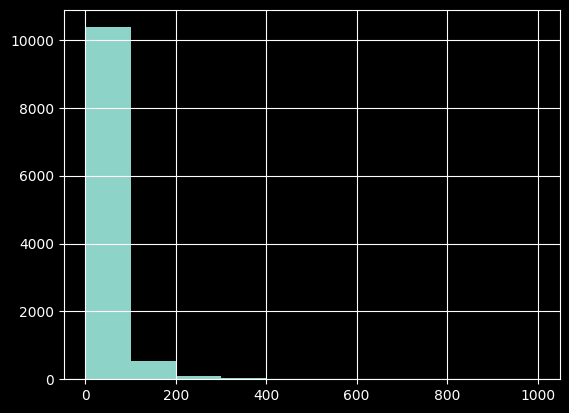

In [97]:
train_full['gtp'].hist()

In [98]:
train_full['gtp'].describe()

count    11090.000000
mean        43.418665
std         51.336128
min          2.000000
25%         20.000000
50%         29.000000
75%         48.000000
max        999.000000
Name: gtp, dtype: float64

In [99]:
train_full['gtp_group']

0         (25.0, 35.0]
1         (19.0, 25.0]
2         (25.0, 35.0]
3        (55.0, 999.0]
4        (55.0, 999.0]
             ...      
11085    (1.999, 19.0]
11086     (19.0, 25.0]
11087     (19.0, 25.0]
11088    (1.999, 19.0]
11089    (1.999, 19.0]
Name: gtp_group, Length: 11090, dtype: category
Categories (5, interval[float64, right]): [(1.999, 19.0] < (19.0, 25.0] < (25.0, 35.0] <
                                           (35.0, 55.0] < (55.0, 999.0]]

In [100]:
model = train_full.groupby(['triglyceride_group','age_group','gtp_group'])['smoking'].agg(['mean'])

In [101]:
model = model.rename({'mean':'score_trigl_age_gtp'},axis=1)

In [102]:
model

score_trigl_age_gtp
triglyceride_group age_group      gtp_group                         
(15.999, 72.0]     (19.999, 30.0] (1.999, 19.0]             0.105809
                                  (19.0, 25.0]              0.118557
                                  (25.0, 35.0]              0.113821
                                  (35.0, 55.0]              0.111111
                                  (55.0, 999.0]             0.200000
...                                                              ...
(182.0, 466.0]     (55.0, 85.0]   (1.999, 19.0]             0.222222
                                  (19.0, 25.0]              0.170732
                                  (25.0, 35.0]              0.148148
                                  (35.0, 55.0]              0.192771
                                  (55.0, 999.0]             0.230769

[125 rows x 1 columns]

In [103]:
train_full = train_full.merge(model, how = 'left', on = ['triglyceride_group','age_group','gtp_group'])

In [104]:
test1 =  test1.merge(model, how = 'left', on = ['triglyceride_group','age_group','gtp_group'])

In [105]:
def print_metrics(df,score):
  print(log_loss(df['smoking'],df[score]))
  print(uplift(df,score,0.2))

In [106]:
print_metrics(train_full,'score_trigl')

0.4916838980017547
1.4553571428571428


In [107]:
print_metrics(test1,'score_trigl')

0.4925423351731327
1.482142857142857


In [108]:
print_metrics(train_full,'score_trigl_age')

0.48448126357564814
1.5959821428571426


In [109]:
print_metrics(test1,'score_trigl_age')

0.48487521761366875
1.4999999999999998


In [110]:
print_metrics(train_full,'score_trigl_age_gtp')

0.47305828149827656
1.7589285714285714


In [111]:
print_metrics(test1,'score_trigl_age_gtp')

0.4828818871787664
1.6517857142857142


# Машинное обучение

In [112]:
! pip install catboost -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [113]:
from catboost import CatBoostClassifier

In [114]:
X

['triglyceride',
 'age',
 'gtp',
 'hemoglobin',
 'tartar',
 'dental_caries',
 'waist(cm)',
 'serum_creatinine',
 'hdl',
 'weight(kg)',
 'fasting_blood_sugar',
 'hearing(left)',
 'height(cm)',
 'urine_protein',
 'hearing(right)',
 'relaxation',
 'ldl',
 'systolic',
 'cholesterol',
 'alt',
 'ast',
 'eyesight(right)',
 'eyesight(left)',
 'smoking']

In [115]:
X1 = ['triglyceride', 'age', 'gtp']
y = ['smoking']

In [116]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.005}

In [117]:
model = CatBoostClassifier(**params)

In [118]:
model.fit(train1[X1],train1[y],eval_set=(val[X1],val[y]))

0:	learn: 0.6908956	test: 0.6908987	best: 0.6908987 (0)	total: 59.8ms	remaining: 59.7s
100:	learn: 0.5521256	test: 0.5521951	best: 0.5521951 (100)	total: 950ms	remaining: 8.46s
200:	learn: 0.5042830	test: 0.5042820	best: 0.5042820 (200)	total: 1.62s	remaining: 6.46s
300:	learn: 0.4867560	test: 0.4867876	best: 0.4867876 (300)	total: 2.18s	remaining: 5.07s
400:	learn: 0.4793005	test: 0.4796819	best: 0.4796819 (400)	total: 2.49s	remaining: 3.72s
500:	learn: 0.4757475	test: 0.4765112	best: 0.4765112 (500)	total: 2.8s	remaining: 2.79s
600:	learn: 0.4734983	test: 0.4751143	best: 0.4751143 (600)	total: 3.12s	remaining: 2.07s
700:	learn: 0.4719227	test: 0.4743941	best: 0.4743941 (700)	total: 3.43s	remaining: 1.46s
800:	learn: 0.4706365	test: 0.4740055	best: 0.4740055 (800)	total: 3.73s	remaining: 927ms
900:	learn: 0.4695171	test: 0.4738344	best: 0.4738219 (893)	total: 4.04s	remaining: 443ms
999:	learn: 0.4684303	test: 0.4737519	best: 0.4737290 (985)	total: 4.34s	remaining: 0us

bestTest = 0.47

In [119]:
test1['score_cat_trigl_age_gtp'] = model.predict_proba(test1[X1])[:,1]

In [120]:
print_metrics(test1,'score_trigl_age_gtp')
print()
print_metrics(test1,'score_cat_trigl_age_gtp')


0.4828818871787664
1.6517857142857142

0.4742189828499178
1.7589285714285714


Вывод: Видим, что машинное обучение на 3 фичах победило человеческое обучение.
И смогло выжить из модели улучшение в 1.76 раз по сравнению со случайной выборкой.

1.65 < 1.76

# Обучимся на всех фичах

In [121]:
X = X[:-1]

In [122]:
X

['triglyceride',
 'age',
 'gtp',
 'hemoglobin',
 'tartar',
 'dental_caries',
 'waist(cm)',
 'serum_creatinine',
 'hdl',
 'weight(kg)',
 'fasting_blood_sugar',
 'hearing(left)',
 'height(cm)',
 'urine_protein',
 'hearing(right)',
 'relaxation',
 'ldl',
 'systolic',
 'cholesterol',
 'alt',
 'ast',
 'eyesight(right)',
 'eyesight(left)']

In [123]:
y

['smoking']

In [124]:
train[X].head()

,triglyceride,age,gtp,hemoglobin,tartar,dental_caries,waist(cm),serum_creatinine,hdl,weight(kg),fasting_blood_sugar,hearing(left),height(cm),urine_protein,hearing(right),relaxation,ldl,systolic,cholesterol,alt,ast,eyesight(right),eyesight(left)
0,51.0,65,122.0,14.0,N,0,91.0,1.2,71.0,75,107.0,1.0,170,3.0,1.0,79.0,52.0,122.0,119.0,16.0,20.0,0.9,0.6
1,239.0,35,40.0,14.6,Y,0,97.0,0.7,46.0,85,117.0,1.0,170,1.0,1.0,88.0,120.0,138.0,204.0,25.0,20.0,1.5,1.5
2,60.0,70,19.0,14.7,Y,0,75.0,0.7,68.0,55,128.0,1.0,165,1.0,1.0,63.0,85.0,115.0,165.0,13.0,15.0,1.0,0.8
3,155.0,35,17.0,17.2,Y,0,83.0,0.8,53.0,85,100.0,1.0,180,1.0,1.0,80.0,125.0,130.0,209.0,18.0,22.0,1.0,1.2
4,73.0,25,14.0,16.5,Y,0,80.0,1.0,58.0,65,94.0,1.0,170,1.0,1.0,75.0,80.0,135.0,153.0,13.0,20.0,1.2,1.5


In [125]:
cat_features = ['tartar', 'dental_caries']

Сделаем код чище и воспользуемся объектами pool из catboost

In [126]:
from catboost import Pool

train_data = Pool(data=train1[X],
                  label=train1[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [127]:
params = {'verbose': 100,
          'random_seed': 42,
          'early_stopping_rounds': 200,
          'learning_rate': 0.025
          }

In [128]:
model = CatBoostClassifier(**params)

In [129]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6824925	test: 0.6824996	best: 0.6824996 (0)	total: 5.98ms	remaining: 5.98s
100:	learn: 0.4615571	test: 0.4711179	best: 0.4711179 (100)	total: 513ms	remaining: 4.57s
200:	learn: 0.4344252	test: 0.4595508	best: 0.4595508 (200)	total: 1.03s	remaining: 4.1s
300:	learn: 0.4165193	test: 0.4550253	best: 0.4550038 (299)	total: 1.55s	remaining: 3.59s
400:	learn: 0.4006492	test: 0.4530987	best: 0.4530987 (400)	total: 2.06s	remaining: 3.07s
500:	learn: 0.3857867	test: 0.4520866	best: 0.4520412 (488)	total: 2.58s	remaining: 2.57s
600:	learn: 0.3710126	test: 0.4510969	best: 0.4510969 (600)	total: 3.09s	remaining: 2.05s
700:	learn: 0.3560926	test: 0.4501774	best: 0.4501500 (699)	total: 3.63s	remaining: 1.55s
800:	learn: 0.3424722	test: 0.4496714	best: 0.4495539 (790)	total: 4.16s	remaining: 1.03s
900:	learn: 0.3291846	test: 0.4493534	best: 0.4491094 (868)	total: 4.69s	remaining: 515ms
999:	learn: 0.3175316	test: 0.4492503	best: 0.4490026 (959)	total: 5.21s	remaining: 0us

bestTest = 0.44

In [130]:
test1['score_all_catboost'] = model.predict_proba(test1[X])[:,1]

In [131]:
print()
print_metrics(test1,'score_all_catboost')



0.4537111955903994
2.017857142857143


# Feature importances

In [132]:
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,gtp,10.293404
1,triglyceride,8.543470
2,age,7.347037
3,hemoglobin,6.910618
4,alt,6.794258
5,waist(cm),5.927211
6,hdl,5.728281
7,ast,5.723153
8,ldl,5.667503
9,fasting_blood_sugar,4.991409


Видим, что самая важная фича - gtp а потом уже идет triglyceride и age, хотя phik нам показал другое.

Но в целом, по сводникам, было видно, что самая важная фича - gtp.

In [133]:
phik_overview['smoking'].sort_values(ascending = False).to_frame()

,smoking
smoking,1.000000
triglyceride,0.190617
age,0.183296
gtp,0.142844
hemoglobin,0.112074
tartar,0.104470
dental_caries,0.089124
waist(cm),0.062522
serum_creatinine,0.055594
hdl,0.050773


# Анализ ошибок модели с помощью библиотеки Phik

In [134]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.4 MB/s eta 0:00:00


In [135]:
import shap
shap.initjs()

In [136]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test1[X])

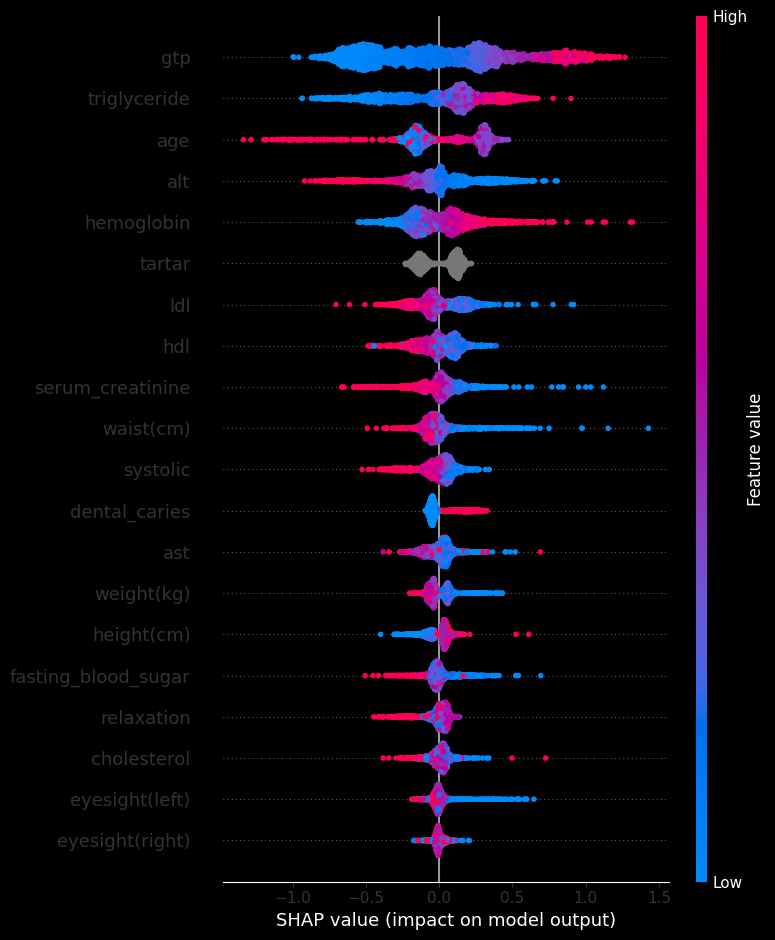

In [137]:
shap.summary_plot(shap_values, test1[X])

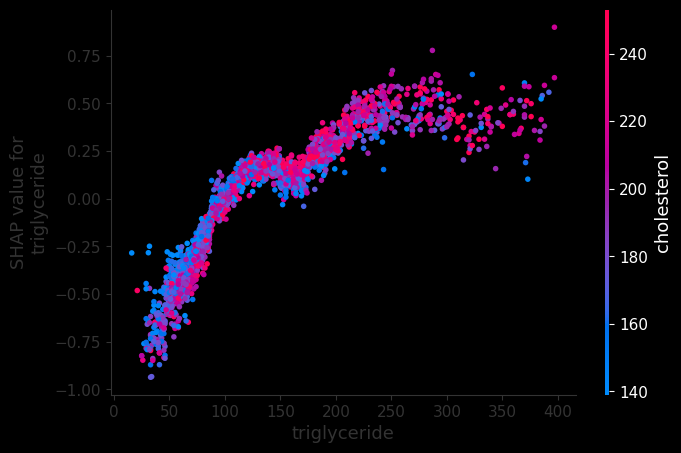

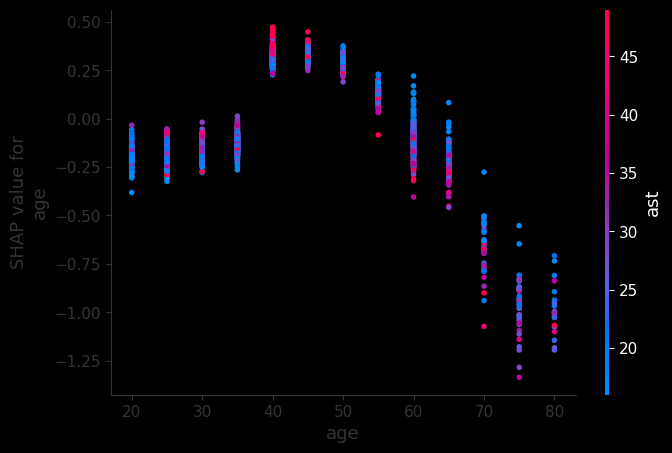

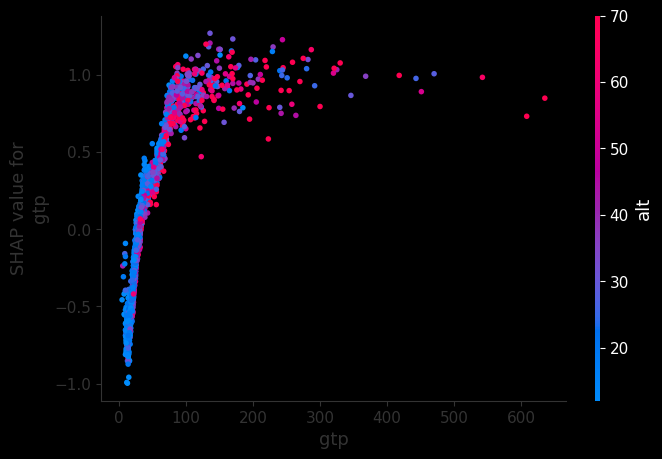

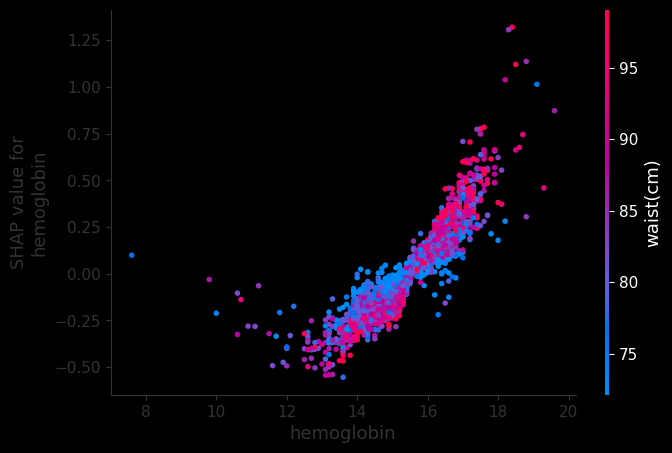

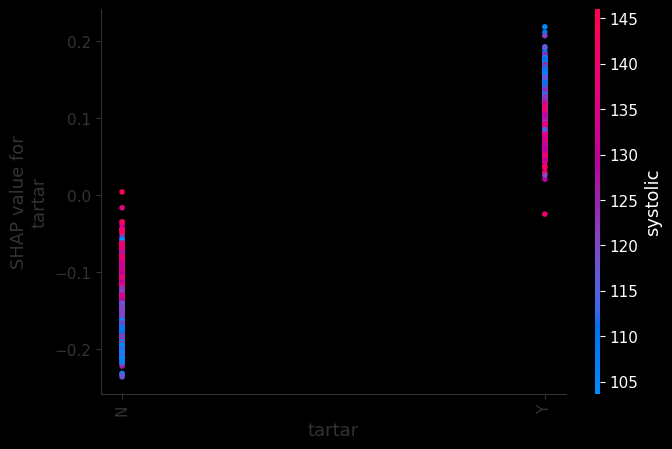

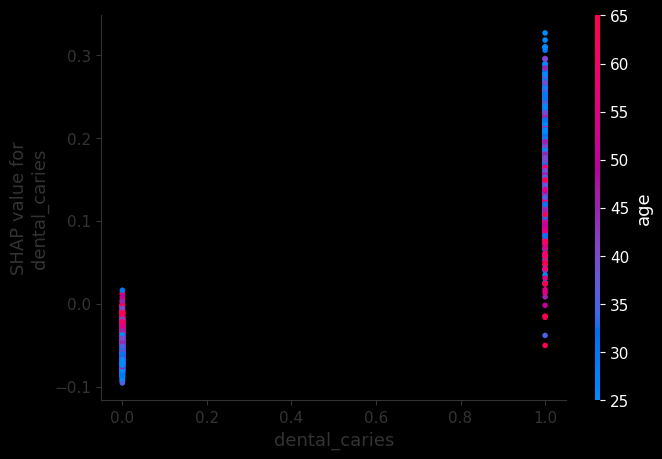

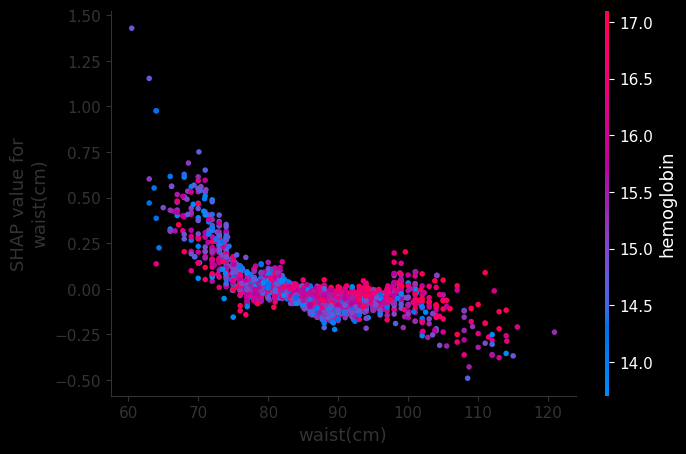

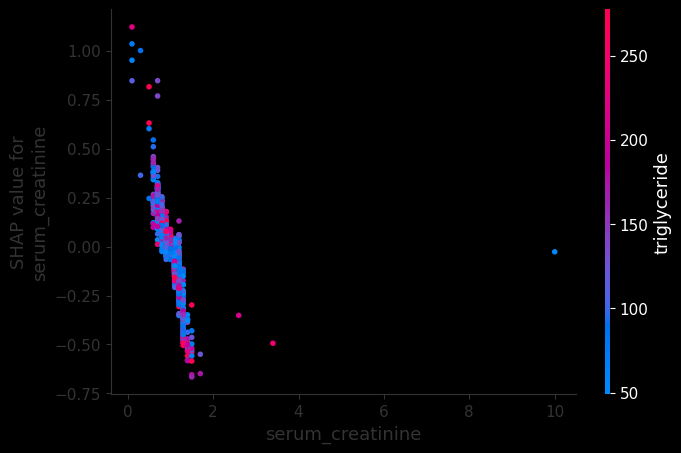

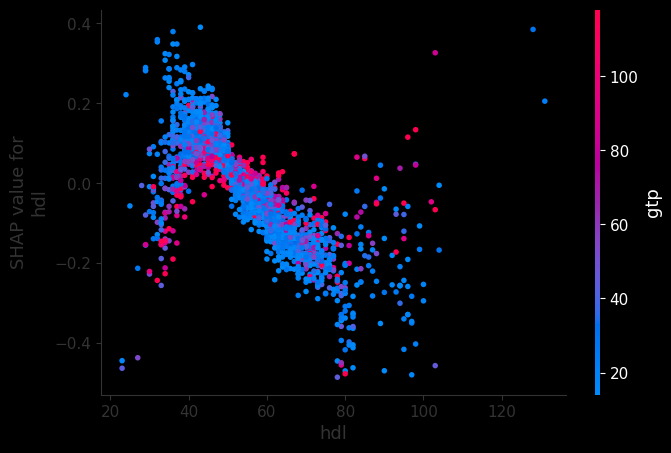

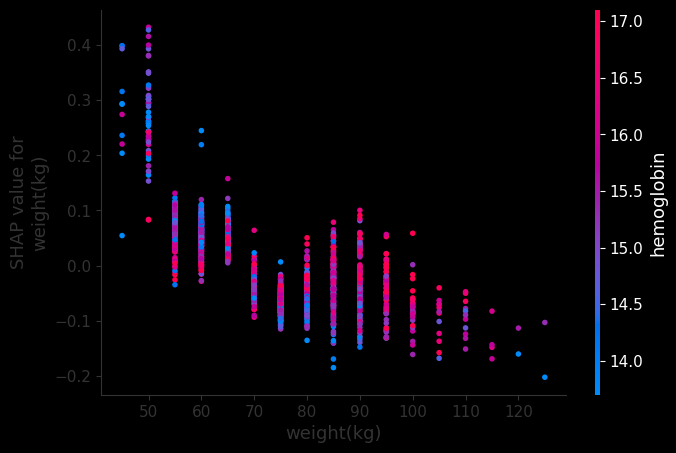

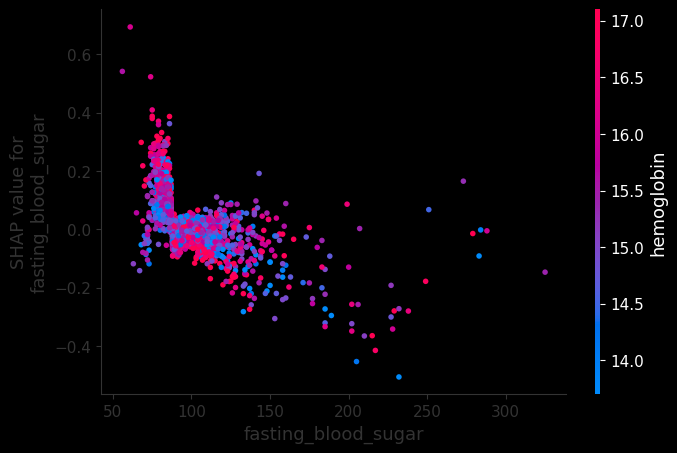

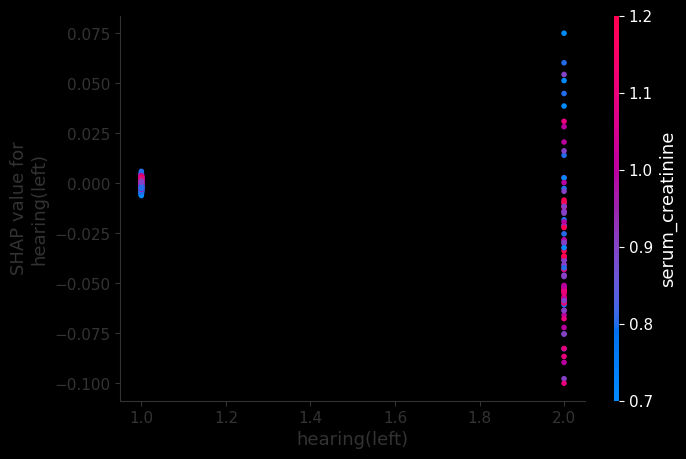

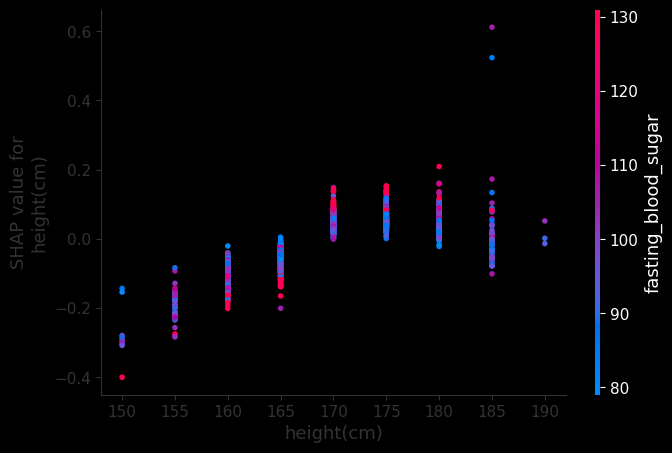

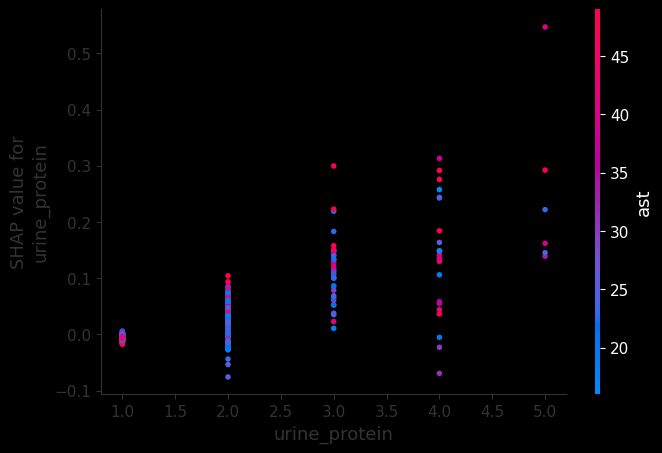

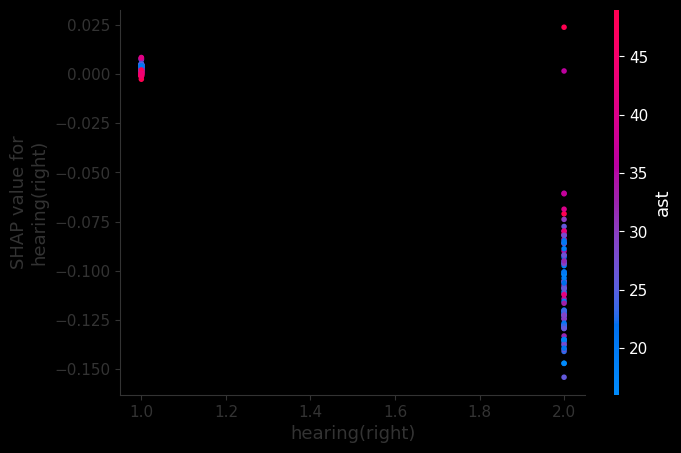

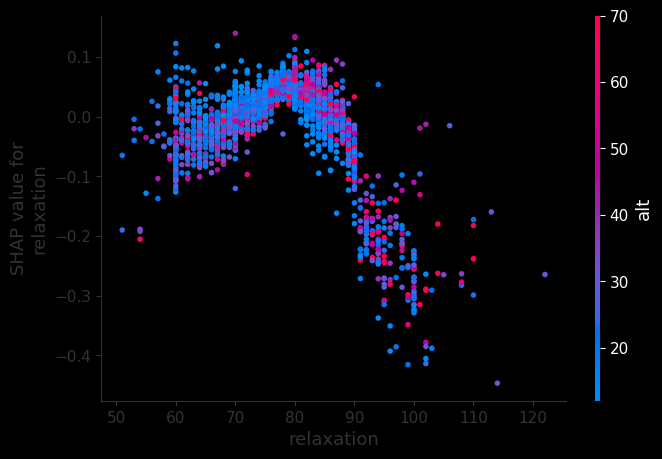

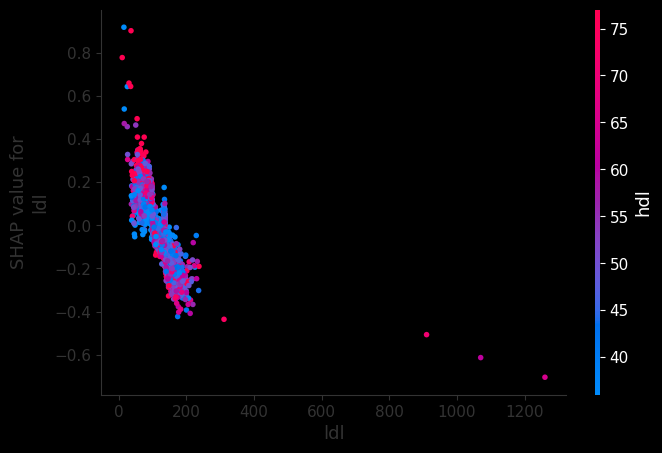

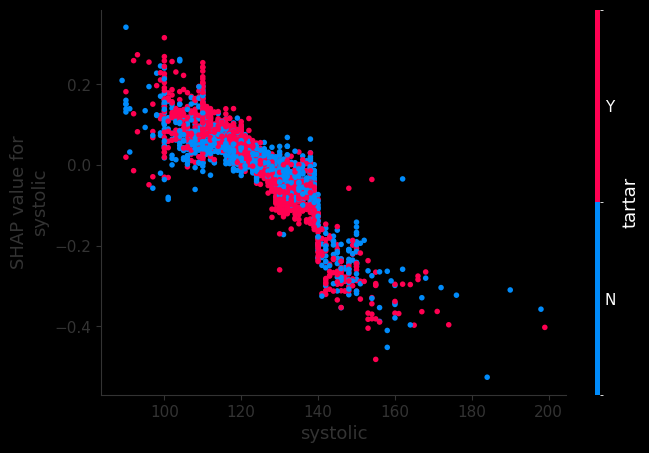

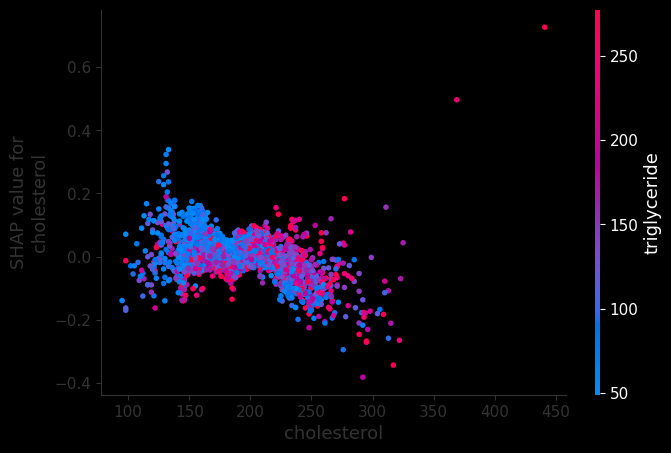

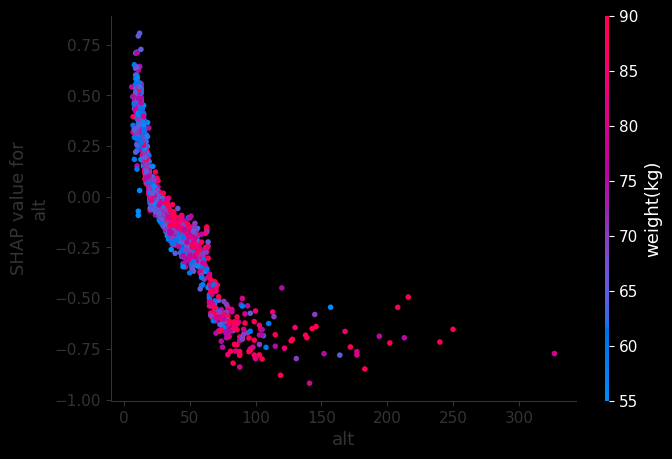

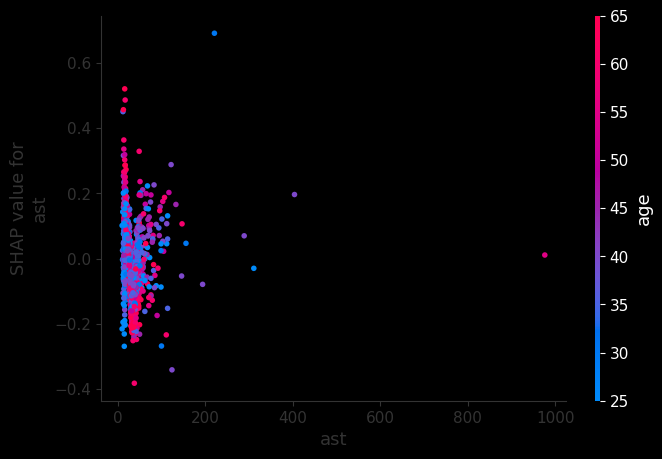

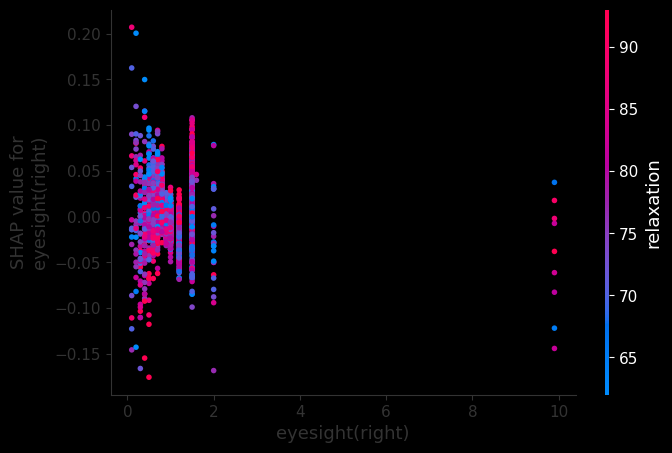

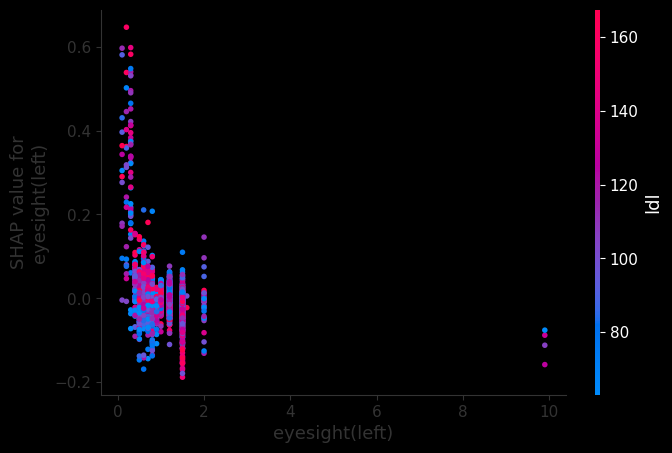

In [138]:
for feature in X:
  shap.dependence_plot(feature, shap_values, test1[X])

# Матрица ошибок и метрики классификации

In [139]:
test1['y_pred'] = model.predict(test1[X])

In [140]:
test1.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,...,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group,score_trigl,score_trigl_age,score_trigl_age_gtp,score_cat_trigl_age_gtp,score_all_catboost,y_pred
0,2157,30,175,85,92.0,1.2,0.3,1.0,1.0,139.0,83.0,92.0,204.0,69.0,48.0,142.0,16.6,1.0,1.2,16.0,20.0,29.0,Y,0,Y,...,"(25.0, 35.0]","(16.2, 19.6]","(91.0, 128.0]","(1.1, 10.0]","(43.0, 49.0]","(80.0, 130.0]","(88.0, 94.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(141.0, 1340.0]","(134.0, 240.0]","(201.0, 222.0]","(17.0, 21.0]","(6.999, 19.0]","(0.099, 0.8]","(1.0, 1.2]",0.117723,0.113687,0.113821,0.124865,0.099788,0
1,7244,45,175,75,81.0,1.2,1.0,1.0,1.0,113.0,60.0,85.0,127.0,80.0,49.0,62.0,15.2,1.0,1.0,19.0,18.0,20.0,Y,1,Y,...,"(19.0, 25.0]","(14.6, 15.2]","(78.0, 82.5]","(0.9, 1.0]","(43.0, 49.0]","(70.0, 75.0]","(47.999, 88.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(6.999, 86.0]","(112.0, 120.0]","(83.999, 164.0]","(17.0, 21.0]","(6.999, 19.0]","(0.8, 1.0]","(1.0, 1.2]",0.163852,0.214602,0.136364,0.171807,0.303642,0
2,5245,25,185,90,92.0,1.2,1.2,1.0,1.0,109.0,62.0,80.0,209.0,122.0,54.0,130.0,15.2,1.0,1.0,27.0,33.0,22.0,Y,0,N,...,"(19.0, 25.0]","(14.6, 15.2]","(91.0, 128.0]","(0.9, 1.0]","(49.0, 56.0]","(80.0, 130.0]","(47.999, 88.0]","(0.999, 2.0]","(175.0, 190.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(121.0, 141.0]","(73.999, 112.0]","(201.0, 222.0]","(27.0, 39.0]","(26.0, 32.0]","(1.0, 1.2]","(1.0, 1.2]",0.214350,0.183673,0.187500,0.162183,0.083455,0
3,16182,40,175,70,85.2,1.0,1.2,1.0,1.0,102.0,82.0,100.0,222.0,107.0,66.0,135.0,15.4,1.0,1.0,30.0,39.0,200.0,Y,0,N,...,"(55.0, 999.0]","(15.2, 15.7]","(82.5, 86.2]","(0.9, 1.0]","(64.0, 359.0]","(60.0, 70.0]","(99.0, 107.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(121.0, 141.0]","(73.999, 112.0]","(201.0, 222.0]","(27.0, 39.0]","(26.0, 32.0]","(1.0, 1.2]","(0.8, 1.0]",0.214350,0.254673,0.318182,0.367395,0.247940,0
4,11005,40,165,60,80.0,1.0,1.2,1.0,1.0,115.0,80.0,92.0,208.0,196.0,44.0,124.0,14.9,1.0,0.8,20.0,17.0,17.0,Y,1,Y,...,"(1.999, 19.0]","(14.6, 15.2]","(78.0, 82.5]","(0.099, 0.8]","(43.0, 49.0]","(39.999, 60.0]","(88.0, 94.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(121.0, 141.0]","(112.0, 120.0]","(201.0, 222.0]","(1.999, 17.0]","(19.0, 22.0]","(1.0, 1.2]","(0.8, 1.0]",0.296466,0.388571,0.277778,0.222920,0.263496,0


In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
tn, fp, fn, tp = confusion_matrix(test1['smoking'],test1['y_pred']).ravel()

In [143]:
tn, fp, fn, tp

(2175, 38, 493, 67)

In [144]:
confusion_matrix(test1['smoking'],test1['y_pred'])

array([[2175,   38],
       [ 493,   67]])

In [145]:
recall = tp / (tp + fn)

In [146]:
precision = tp / (tp + fp)

In [147]:
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [148]:
from sklearn.metrics import f1_score

In [149]:
f1_score(test1['smoking'],test1['y_pred'])

0.20150375939849624

In [150]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(test1['smoking'],test1['y_pred']))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2213
           1       0.64      0.12      0.20       560

    accuracy                           0.81      2773
   macro avg       0.73      0.55      0.55      2773
weighted avg       0.78      0.81      0.75      2773



In [152]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking,triglyceride_group,age_group,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0,"(15.999, 72.0]","(55.0, 85.0]","(55.0, 999.0]","(6.2989999999999995, 14.6]","(86.2, 91.0]","(1.1, 10.0]","(64.0, 359.0]","(70.0, 75.0]","(99.0, 107.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(6.999, 86.0]","(120.0, 126.0]","(83.999, 164.0]","(1.999, 17.0]","(19.0, 22.0]","(0.8, 1.0]","(0.099, 0.8]"
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1,"(182.0, 466.0]","(30.0, 35.0]","(35.0, 55.0]","(6.2989999999999995, 14.6]","(91.0, 128.0]","(0.099, 0.8]","(43.0, 49.0]","(80.0, 130.0]","(107.0, 475.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(85.0, 140.0]","(105.0, 121.0]","(134.0, 240.0]","(201.0, 222.0]","(21.0, 27.0]","(19.0, 22.0]","(1.2, 9.9]","(1.2, 9.9]"
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0,"(15.999, 72.0]","(55.0, 85.0]","(1.999, 19.0]","(14.6, 15.2]","(50.999, 78.0]","(0.099, 0.8]","(64.0, 359.0]","(39.999, 60.0]","(107.0, 475.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(6.999, 86.0]","(112.0, 120.0]","(164.0, 184.0]","(1.999, 17.0]","(6.999, 19.0]","(0.8, 1.0]","(0.099, 0.8]"
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0,"(131.0, 182.0]","(30.0, 35.0]","(1.999, 19.0]","(16.2, 19.6]","(82.5, 86.2]","(0.099, 0.8]","(49.0, 56.0]","(80.0, 130.0]","(99.0, 107.0]","(0.999, 2.0]","(175.0, 190.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(121.0, 141.0]","(126.0, 134.0]","(201.0, 222.0]","(17.0, 21.0]","(19.0, 22.0]","(0.8, 1.0]","(1.0, 1.2]"
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1,"(72.0, 99.0]","(19.999, 30.0]","(1.999, 19.0]","(16.2, 19.6]","(78.0, 82.5]","(0.9, 1.0]","(56.0, 64.0]","(60.0, 70.0]","(88.0, 94.0]","(0.999, 2.0]","(165.0, 170.0]","(0.999, 6.0]","(0.999, 2.0]","(70.0, 75.0]","(6.999, 86.0]","(134.0, 240.0]","(83.999, 164.0]","(1.999, 17.0]","(19.0, 22.0]","(1.0, 1.2]","(1.2, 9.9]"


Видим, что модель довольно сильно ошибается на false_negative, то есть когда у нас курильщик, модель отвечает что он таким не является.

Попробуем найти оптимальный порог, чтобы улучшить модель. Также можно попробовать избавиться от выбросов в наших данных, то есть взять только те данные, которые входят в Q1-Q3


# Определение оптимального порога.

In [153]:
from tqdm.notebook import tqdm


In [154]:
test1.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,...,gtp_group,hemoglobin_group,waist(cm)_group,serum_creatinine_group,hdl_group,weight(kg)_group,fasting_blood_sugar_group,hearing(left)_group,height(cm)_group,urine_protein_group,hearing(right)_group,relaxation_group,ldl_group,systolic_group,cholesterol_group,alt_group,ast_group,eyesight(right)_group,eyesight(left)_group,score_trigl,score_trigl_age,score_trigl_age_gtp,score_cat_trigl_age_gtp,score_all_catboost,y_pred
0,2157,30,175,85,92.0,1.2,0.3,1.0,1.0,139.0,83.0,92.0,204.0,69.0,48.0,142.0,16.6,1.0,1.2,16.0,20.0,29.0,Y,0,Y,...,"(25.0, 35.0]","(16.2, 19.6]","(91.0, 128.0]","(1.1, 10.0]","(43.0, 49.0]","(80.0, 130.0]","(88.0, 94.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(141.0, 1340.0]","(134.0, 240.0]","(201.0, 222.0]","(17.0, 21.0]","(6.999, 19.0]","(0.099, 0.8]","(1.0, 1.2]",0.117723,0.113687,0.113821,0.124865,0.099788,0
1,7244,45,175,75,81.0,1.2,1.0,1.0,1.0,113.0,60.0,85.0,127.0,80.0,49.0,62.0,15.2,1.0,1.0,19.0,18.0,20.0,Y,1,Y,...,"(19.0, 25.0]","(14.6, 15.2]","(78.0, 82.5]","(0.9, 1.0]","(43.0, 49.0]","(70.0, 75.0]","(47.999, 88.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(6.999, 86.0]","(112.0, 120.0]","(83.999, 164.0]","(17.0, 21.0]","(6.999, 19.0]","(0.8, 1.0]","(1.0, 1.2]",0.163852,0.214602,0.136364,0.171807,0.303642,0
2,5245,25,185,90,92.0,1.2,1.2,1.0,1.0,109.0,62.0,80.0,209.0,122.0,54.0,130.0,15.2,1.0,1.0,27.0,33.0,22.0,Y,0,N,...,"(19.0, 25.0]","(14.6, 15.2]","(91.0, 128.0]","(0.9, 1.0]","(49.0, 56.0]","(80.0, 130.0]","(47.999, 88.0]","(0.999, 2.0]","(175.0, 190.0]","(0.999, 6.0]","(0.999, 2.0]","(39.999, 70.0]","(121.0, 141.0]","(73.999, 112.0]","(201.0, 222.0]","(27.0, 39.0]","(26.0, 32.0]","(1.0, 1.2]","(1.0, 1.2]",0.214350,0.183673,0.187500,0.162183,0.083455,0
3,16182,40,175,70,85.2,1.0,1.2,1.0,1.0,102.0,82.0,100.0,222.0,107.0,66.0,135.0,15.4,1.0,1.0,30.0,39.0,200.0,Y,0,N,...,"(55.0, 999.0]","(15.2, 15.7]","(82.5, 86.2]","(0.9, 1.0]","(64.0, 359.0]","(60.0, 70.0]","(99.0, 107.0]","(0.999, 2.0]","(170.0, 175.0]","(0.999, 6.0]","(0.999, 2.0]","(80.0, 85.0]","(121.0, 141.0]","(73.999, 112.0]","(201.0, 222.0]","(27.0, 39.0]","(26.0, 32.0]","(1.0, 1.2]","(0.8, 1.0]",0.214350,0.254673,0.318182,0.367395,0.247940,0
4,11005,40,165,60,80.0,1.0,1.2,1.0,1.0,115.0,80.0,92.0,208.0,196.0,44.0,124.0,14.9,1.0,0.8,20.0,17.0,17.0,Y,1,Y,...,"(1.999, 19.0]","(14.6, 15.2]","(78.0, 82.5]","(0.099, 0.8]","(43.0, 49.0]","(39.999, 60.0]","(88.0, 94.0]","(0.999, 2.0]","(144.999, 165.0]","(0.999, 6.0]","(0.999, 2.0]","(75.0, 80.0]","(121.0, 141.0]","(112.0, 120.0]","(201.0, 222.0]","(1.999, 17.0]","(19.0, 22.0]","(1.0, 1.2]","(0.8, 1.0]",0.296466,0.388571,0.277778,0.222920,0.263496,0


In [155]:
test1['score_all_catboost'].nunique()

2709

In [156]:
len(test1)

2773

In [157]:
test1['score_all_catboost'].unique().min()

0.012706775211482996

In [158]:
thrs = [0] + list(test1['score_all_catboost'].unique())

In [159]:
result = []
for thr in tqdm(thrs):
  test1['y_pred_new'] = (test1['score_all_catboost'] > thr) * 1
  result.append((thr,
                 f1_score(test1['smoking'],test1['y_pred_new'])))

  0%|          | 0/2710 [00:00<?, ?it/s]

In [160]:
t = pd.DataFrame(result, columns = ['thr','f1_score'])

In [161]:
t[t['f1_score'] == t['f1_score'].max()]

,thr,f1_score
2178,0.194008,0.438875


In [176]:
test1.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking',
       'triglyceride_group', 'age_group', 'gtp_group', 'hemoglobin_group',
       'waist(cm)_group', 'serum_creatinine_group', 'hdl_group',
       'weight(kg)_group', 'fasting_blood_sugar_group', 'hearing(left)_group',
       'height(cm)_group', 'urine_protein_group', 'hearing(right)_group',
       'relaxation_group', 'ldl_group', 'systolic_group', 'cholesterol_group',
       'alt_group', 'ast_group', 'eyesight(right)_group',
       'eyesight(left)_group', 'score_trigl', 'score_trigl_age',
       'score_trigl_age_gtp', 'score_cat_trigl_age_gtp', 'score_all_catboost',
       'y_pred', 'y_pred_new'],
      dtype='object')

# Метрики классификации

## ROC CURVE

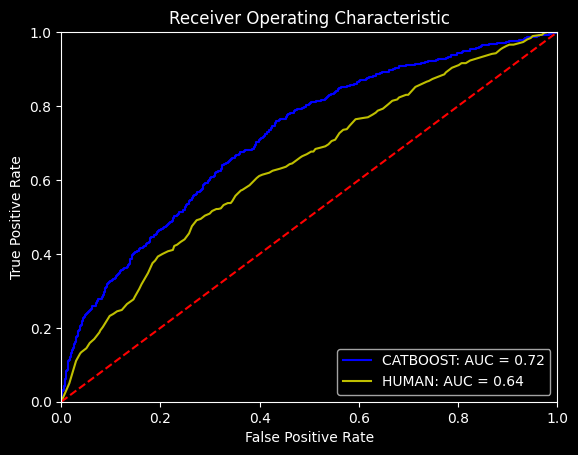

In [178]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test1['smoking'], test1['score_all_catboost'])
fpr1,tpr1, threshold1 = metrics.roc_curve(test1['smoking'], test1['score_trigl_age_gtp'])
roc_auc = metrics.auc(fpr, tpr)
roc_auc1 = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'CATBOOST: AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'y', label = 'HUMAN: AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Precision - Recall curve

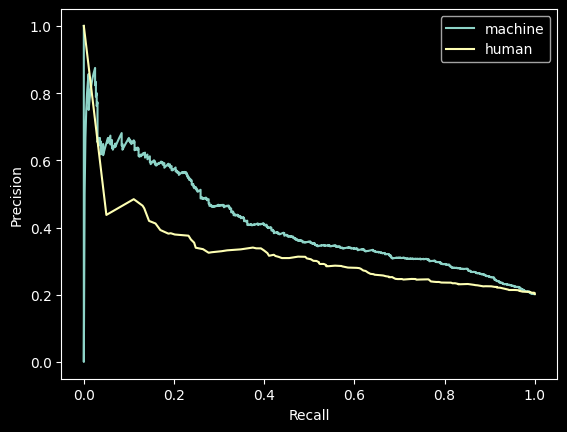

In [180]:

precision1, recall1, _ = metrics.precision_recall_curve(test1['smoking'], test1['score_all_catboost'])
precision2, recall2, _ = metrics.precision_recall_curve(test1['smoking'], test1['score_trigl_age_gtp'])


# plot the precision-recall curves
plt.plot(recall1, precision1, label='machine')
plt.plot(recall2, precision2, label='human')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Submition на kaggle

Берем теперь всю тренировучную выборку train.



In [162]:
from catboost import Pool

train_data = Pool(data=train_full[X],
                  label=train_full[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=test1[X],
                  label=test1[y],
                  cat_features=cat_features
                 )

In [163]:
params = {'verbose': 100,
          'random_seed': 42,
          'early_stopping_rounds': 200,
          'learning_rate': 0.028
          }

In [164]:
model = CatBoostClassifier(**params)

In [165]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6806974	test: 0.6806151	best: 0.6806151 (0)	total: 66.3ms	remaining: 1m 6s
100:	learn: 0.4577079	test: 0.4696395	best: 0.4696395 (100)	total: 2.4s	remaining: 21.4s
200:	learn: 0.4337060	test: 0.4605358	best: 0.4605358 (200)	total: 4.96s	remaining: 19.7s
300:	learn: 0.4179578	test: 0.4573599	best: 0.4573599 (300)	total: 7.35s	remaining: 17.1s
400:	learn: 0.4031435	test: 0.4555388	best: 0.4554347 (393)	total: 12.4s	remaining: 18.5s
500:	learn: 0.3891730	test: 0.4549363	best: 0.4547907 (465)	total: 15.1s	remaining: 15s
600:	learn: 0.3758884	test: 0.4541494	best: 0.4541429 (598)	total: 17.8s	remaining: 11.8s
700:	learn: 0.3634883	test: 0.4530036	best: 0.4530017 (698)	total: 20.3s	remaining: 8.64s
800:	learn: 0.3509753	test: 0.4525879	best: 0.4523324 (754)	total: 23.3s	remaining: 5.79s
900:	learn: 0.3399962	test: 0.4522740	best: 0.4522726 (899)	total: 27.8s	remaining: 3.05s
999:	learn: 0.3290123	test: 0.4523670	best: 0.4520857 (967)	total: 31s	remaining: 0us

bestTest = 0.452085

In [166]:
model.best_iteration_

967

In [167]:
train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

In [168]:
params = {'verbose': 100,
          'random_seed': 42,
          'iterations': model.best_iteration_ + 1,
          'early_stopping_rounds': 200,
          'learning_rate': 0.028
          }

In [169]:
model = CatBoostClassifier(**params)

In [170]:
model.fit(train_data)

0:	learn: 0.6807080	total: 18.8ms	remaining: 18.1s
100:	learn: 0.4600865	total: 2.58s	remaining: 22.1s
200:	learn: 0.4387688	total: 4.65s	remaining: 17.7s
300:	learn: 0.4251726	total: 6.98s	remaining: 15.5s
400:	learn: 0.4120526	total: 11.4s	remaining: 16.1s
500:	learn: 0.3980460	total: 13.1s	remaining: 12.2s
600:	learn: 0.3852039	total: 15.1s	remaining: 9.21s
700:	learn: 0.3740304	total: 16.8s	remaining: 6.4s
800:	learn: 0.3641155	total: 18.9s	remaining: 3.94s
900:	learn: 0.3535883	total: 20.5s	remaining: 1.52s
967:	learn: 0.3472900	total: 21.5s	remaining: 0us


In [171]:
real_test['smoking'] = (model.predict_proba(real_test[X])[:,1]>0.194008)*1

In [172]:
real_test = real_test.rename({'id':'ID'}, axis = 1)

In [173]:
real_test[['ID','smoking']].to_csv('/content/optimal_trh_submission.csv', index=False)